<a href="https://colab.research.google.com/github/KOO-96/DNA_seminar/blob/main/%EA%B5%AC%EC%84%B1%EC%A4%80_%EA%B3%BC%EC%A0%9C_%EC%84%B8%EB%AF%B8%EB%82%98_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 현재 경로를 앞으로 진행할 프로젝트 디렉토리로 이동한다.
%cd /content/drive/MyDrive/CV_seminar_project 

/content/drive/MyDrive/CV_seminar_project


In [ ]:
pwd

'/content/drive/MyDrive/CV_seminar_project'

In [ ]:
import glob

dolphin = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*.jpg')
shark = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*.jpg')
whale = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*.jpg')

dic = {'dolphin':dolphin, 'shark': shark, 'whale': whale}
for key in dic.keys():
  print(f'{key}이미지가 ',len(dic[key]), '개 있습니다.')
print('------------------------------------------------------------------------')

length_list = []
for key in dic.keys():
  print(f'{key}이미지는 trian, valid, test셋에 대해 ',int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1), '개씩 배정해주세요.')
  length_list.append([int(len(dic[key])*0.7), int(len(dic[key])*0.2), int(len(dic[key])*0.1)])

dolphin이미지가  373 개 있습니다.
shark이미지가  488 개 있습니다.
whale이미지가  451 개 있습니다.
------------------------------------------------------------------------
dolphin이미지는 trian, valid, test셋에 대해  261 74 37 개씩 배정해주세요.
shark이미지는 trian, valid, test셋에 대해  341 97 48 개씩 배정해주세요.
whale이미지는 trian, valid, test셋에 대해  315 90 45 개씩 배정해주세요.


## 1번째 방법


In [ ]:
import os, shutil, random
import glob
import cv2
import time

class Make_dataset_dir():
  def __init__(self, root_dir):
    self.root_path = root_dir+'/' if root_dir[-1] != '/' else root_dir 
    # 현재 진행할 프로젝트 -> root path는 /content/drive/MyDrive/CV_seminar_project/ 가 되어야합니다.
    self.img_path_list = root_dir+'original' # 전달한 이미지들의 상위 경로
    self.trainset_path = root_dir+'train/'
    self.validset_path = root_dir+'valid/'
    self.testset_path = root_dir+'test/'
    self.class_list = ['dolphin', 'shark', 'whale']

  def mk_dir(self):
    '''train, valid, test 폴더를 만들고, 내부에는 클래스 별 폴더를 추가로 만들어 주세요.'''
    for i in self.class_list:
      train = self.trainset_path + i
      valid = self.validset_path + i
      test = self.testset_path + i
      for path in [train, valid, test]:
        os.makedirs(path, exist_ok = True)
    
  def move_img(self):
    # dolphin path
    train_dol_path = self.trainset_path + 'dolphin'
    valid_dol_path = self.validset_path + 'dolphin'
    test_dol_path = self.testset_path + 'dolphin'
    # shark path
    train_sh_path = self.trainset_path + 'shark'
    valid_sh_path = self.validset_path + 'shark'
    test_sh_path = self.testset_path + 'shark'
    # whale_path
    train_wh_path = self.trainset_path + 'whale'
    valid_wh_path = self.validset_path + 'whale'
    test_wh_path = self.testset_path + 'whale'

    # original 폴더 내 파일명 리스트로 반환
    dol_path = self.img_path_list +'/dolphin'
    sh_path = self.img_path_list +'/shark'
    wh_path = self.img_path_list +'/whale'

    dolphin_list = os.listdir(dol_path)
    shark_list = os.listdir(sh_path)
    whale_list = os.listdir(wh_path)

    #dolphin 7:3:1 분류 진행 -> 차집합 이용  train: a1 ; valid: b1 ; test:c1
    a1, b1, c1 = [], [], []
    for j in random.sample(dolphin_list, round(len(dolphin)*0.70)):
      a1.append(j)
      b0 = [x for x in dolphin_list if x not in a1]
    for k in random.sample(b0, round(len(b0)*0.67)):
      b1.append(k)
      c1 = [x for x in b0 if x not in b1]


    #shark 7:3:1 분류 진행 -> 차집합 이용  train: a2 ; valid: b2 ; test:c2
    a2, b2, c2 = [], [], []
    for l in random.sample(shark_list, round(len(shark)*0.70)):
      a2.append(l)
      b4 = [x for x in shark_list if x not in a2]
    for m in random.sample(b4, round(len(b4)*0.67)):
      b2.append(m)
      c2 = [x for x in b4 if x not in b2]


    #whale 7:3:1 분류 진행 -> 차집합 이용  train: a3 ; valid: b3 ; test:c3
    a3, b3, c3 = [], [], []
    for n in random.sample(whale_list, round(len(whale)*0.70)):
      a3.append(n)
      b5 = [x for x in whale_list if x not in a3]
    for k in random.sample(b5, round(len(b5)*0.67)):
      b3.append(k)
      c3 = [x for x in b5 if x not in b3]

    # 폴더 이동 original -> train, valid, test
    for i in dolphin_list:
      if i in a1:
        shutil.copy(dol_path + '/' + i, train_dol_path + '/' + i)
      elif i in b1:
        shutil.copy(dol_path + '/' + i, valid_dol_path + '/' + i)
      elif i in c1:
        shutil.copy(dol_path + '/' + i, test_dol_path + '/' + i)

    for i in shark_list:
      if i in a2:
        shutil.copy(sh_path + '/' + i, train_sh_path + '/' + i)
      elif i in b2:
        shutil.copy(sh_path + '/' + i, valid_sh_path + '/' + i)
      elif i in c2:
        shutil.copy(sh_path + '/' + i, test_sh_path + '/' + i)

    for i in whale_list:
      if i in a3:
        shutil.copy(wh_path + '/' + i, train_wh_path + '/' + i)
      elif i in b3:
        shutil.copy(wh_path + '/' + i, valid_wh_path + '/' + i)
      elif i in c3:
        shutil.copy(wh_path + '/' + i, test_wh_path + '/' + i)

  def run(self):
    start = time.time()
    self.mk_dir()
    self.move_img()
    print('총 소요시간: ', time.time()-start)

  def checking_dirs(self):
    path_list = [self.trainset_path, self.validset_path, self.testset_path]
    for i,path in enumerate(path_list):
      length_dic = {}
      for cls in self.class_list:
        length_dic[cls] = len(glob.glob(path+cls+'/*'))

      if i==0:
        for key in length_dic:
          print( f'trainset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      elif i==1:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')
        print('---------------------------------------------------------------')
      else:
        for key in length_dic:
          print( f'validset의 {key}클래스 개수: {length_dic[key]}')


In [ ]:
Make_dataset_dir('/content/drive/MyDrive/CV_seminar_project/').run()

총 소요시간:  227.34307074546814


In [ ]:
Make_dataset_dir('/content/drive/MyDrive/CV_seminar_project/').checking_dirs()

trainset의 dolphin클래스 개수: 261
trainset의 shark클래스 개수: 342
trainset의 whale클래스 개수: 316
---------------------------------------------------------------
validset의 dolphin클래스 개수: 75
validset의 shark클래스 개수: 98
validset의 whale클래스 개수: 90
---------------------------------------------------------------
validset의 dolphin클래스 개수: 37
validset의 shark클래스 개수: 48
validset의 whale클래스 개수: 45


----- 시각화 -----


<Figure size 720x720 with 0 Axes>

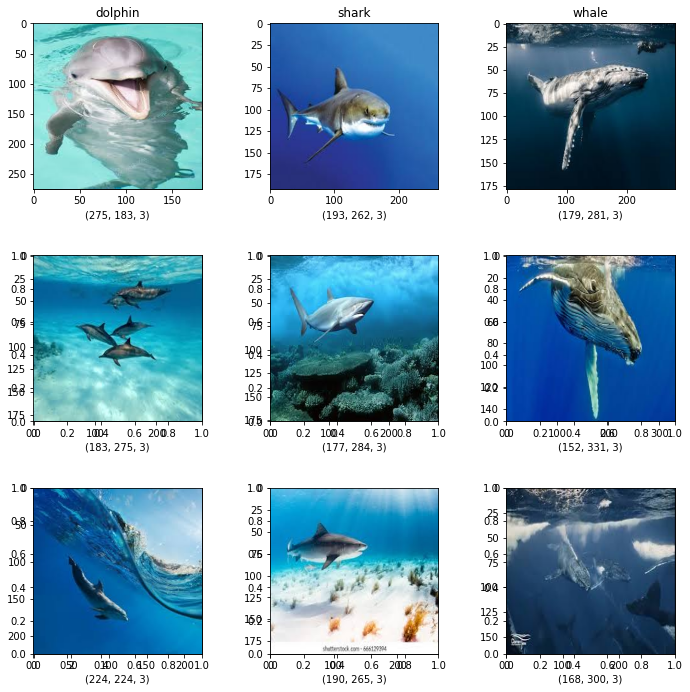

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # cv2.imshow(img)가 안되므로 
from PIL import Image as PILImage

fig = plt.figure(figsize=(10,10))

dolphin_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/dolphin/*')
shark_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/shark/*')
whale_img_list = glob.glob('/content/drive/MyDrive/CV_seminar_project/original/whale/*')

print('----- 시각화 -----')
new_list = []
dol_list, sh_list, wh_list = random.sample(dolphin_img_list,3), random.sample(shark_img_list,3), random.sample(whale_img_list,3)
new_list.append(dol_list) ; new_list.append(sh_list); new_list.append(wh_list)
new_list = sum(new_list,[])
new_list[1], new_list[2], new_list[3], new_list[5], new_list[6], new_list[7] = new_list[3], new_list[6], new_list[1], new_list[7], new_list[2], new_list[5]

rows = 3 ; columns = 3
fig, axes = plt.subplots(rows, columns, figsize = (10, 10))

for i in range(1, len(new_list)+1):
  fig.add_subplot(rows, columns, i)
  image = cv2.imread(new_list[i-1])
  image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(image_2, aspect = 'auto')
  plt.xlabel(image_2.shape)
  names = ['dolphin', 'shark', 'whale']
  for idx, ax in enumerate(axes[0]):
    ax.set_title(names[idx])
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()

----- 픽셀 수정 -----


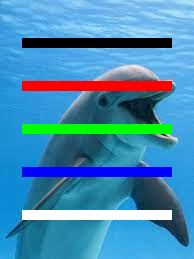

In [ ]:
print('----- 픽셀 수정 -----')
image = cv2.imread(dolphin_img_list[0])

for x1 in range(22,172):
  for y1 in range(38,48):
    image[y1,x1] = (0,0,0)

for x2 in range(22,172):
  for y2 in range(81,91):
    image[y2,x2] = (0,0,255)

for x3 in range(22,172):
  for y3 in range(124,134):
    image[y3,x3] = (0,255,0)

for x4 in range(22,172):
  for y4 in range(167,177):
    image[y4,x4] = (255,0,0)

for x5 in range(22,172):
  for y5 in range(210,220):
    image[y5,x5] = (255,255,255)

cv2_imshow(image)